##  Datathon
Problema: a partir de un conjunto de datos relacionado a la venta de inmuebles, predecir si las propiedades son caras o baratas tomando como criterio el promedio de los precios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import missingno as msno


#### Contruccion de la variable objetivo:
1:caro, 0:barato

In [2]:

df_train=pd.read_csv("properties_colombia_train.csv")# importamos los datos


In [3]:
df_train[df_train.duplicated()] #verifico duplicados

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry


In [4]:
df_train.isnull().sum()# verifico nulos

Unnamed: 0              0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 49498
lon                 49498
l1                      0
l2                      0
l3                  11032
l4                 152182
l5                 170140
l6                 190682
rooms              170012
bedrooms           157024
bathrooms           41082
surface_total      190575
surface_covered    187747
price                  63
currency               67
price_period       161578
title                   1
description           121
property_type           0
operation_type          0
geometry                0
dtype: int64

In [5]:
imputer_sim = SimpleImputer(strategy = 'mean') 
df_train['price'] = imputer_sim.fit_transform(df_train[['price']]) #imputo con la media valores faltantes en columna price

In [6]:
df_train['target'] = np.where(df_train['price']> df_train.price.mean(), 1 ,0)#creo la columna target con 1 y 0 si es mayor  al promedio

In [7]:
df_train["target"].value_counts()# verifico cantidad de una y otra clase al parecer no estan desbalanceadas

0    151128
1     46421
Name: target, dtype: int64

#### Exploración y transformacion de datos 

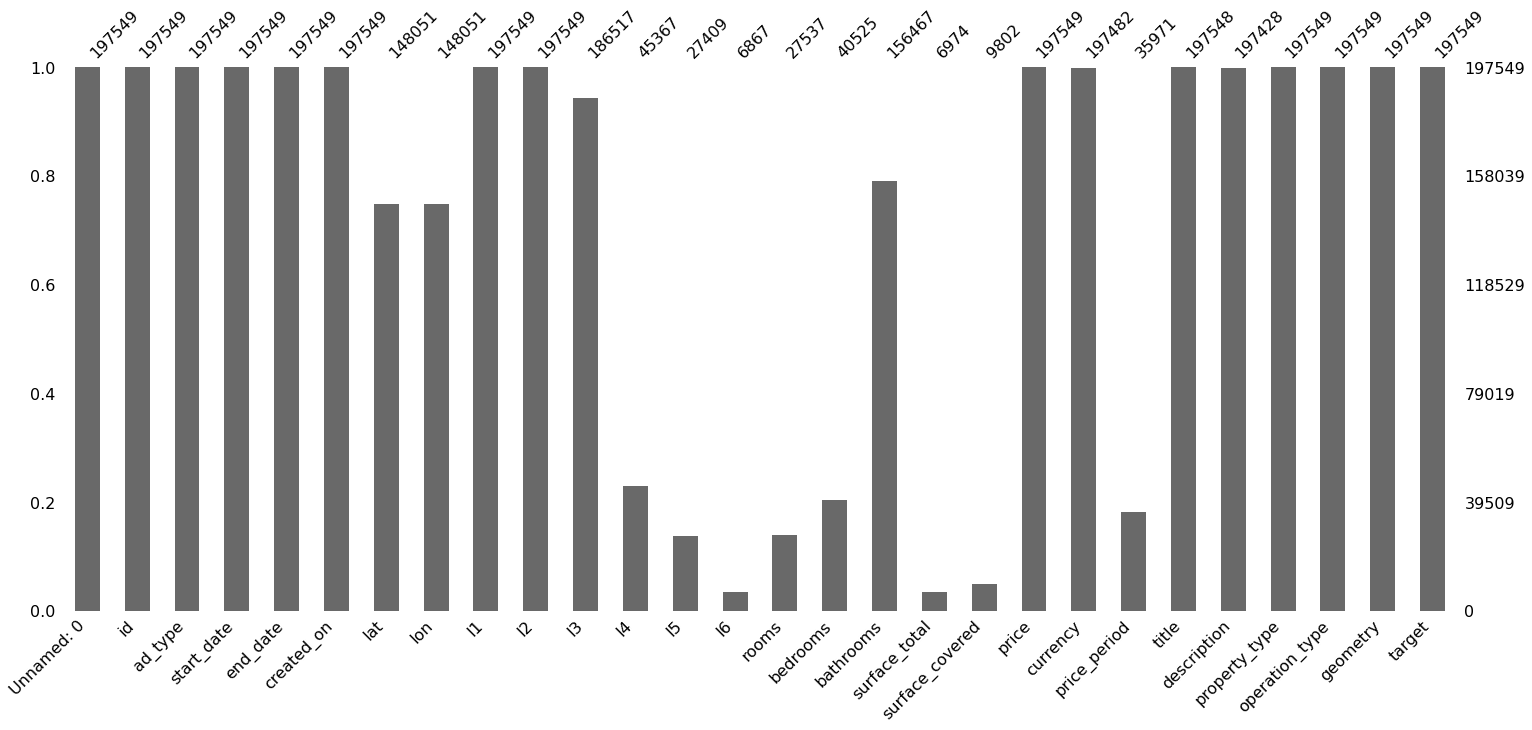

In [8]:
msno.bar(df_train)
plt.show()

In [9]:


#verifico % valores null 
print('Porcentaje de valores faltantes de la variable lat:', (df_train.lat.isnull().sum()/len(df_train)) * 100)
print('Porcentaje de valores faltantes de la variable lon:', (df_train.lon.isnull().sum()/len(df_train)) * 100)
print('Porcentaje de valores faltantes de la variable l3:', (df_train.l3.isnull().sum()/len(df_train)) * 100)
print('Porcentaje de valores faltantes de la variable l4:', (df_train.l4.isnull().sum()/len(df_train)) * 100)
print('Porcentaje de valores faltantes de la variable l5:', (df_train.l5.isnull().sum()/len(df_train)) * 100)
print('Porcentaje de valores faltantes de la variable l6:', (df_train.l6.isnull().sum()/len(df_train)) * 100)
print('Porcentaje de valores faltantes de la variable rooms:', (df_train.rooms.isnull().sum()/len(df_train)) * 100)
print('Porcentaje de valores faltantes de la variable bedrooms:', (df_train.bedrooms.isnull().sum()/len(df_train)) * 100)
print('Porcentaje de valores faltantes de la variable bathrooms:', (df_train.bathrooms.isnull().sum()/len(df_train)) * 100)
print('Porcentaje de valores faltantes de la variable surface_total:', (df_train.surface_total.isnull().sum()/len(df_train)) * 100)
print('Porcentaje de valores faltantes de la variable surface_covered:', (df_train.surface_covered.isnull().sum()/len(df_train)) * 100)
print('Porcentaje de valores faltantes de la variable currency:', (df_train.currency.isnull().sum()/len(df_train)) * 100)
print('Porcentaje de valores faltantes de la variable price_period:', (df_train.price_period.isnull().sum()/len(df_train)) * 100)


Porcentaje de valores faltantes de la variable lat: 25.05606204030392
Porcentaje de valores faltantes de la variable lon: 25.05606204030392
Porcentaje de valores faltantes de la variable l3: 5.584437278852335
Porcentaje de valores faltantes de la variable l4: 77.03506471812057
Porcentaje de valores faltantes de la variable l5: 86.12546760550546
Porcentaje de valores faltantes de la variable l6: 96.52390039939458
Porcentaje de valores faltantes de la variable rooms: 86.06067355440928
Porcentaje de valores faltantes de la variable bedrooms: 79.48610218224339
Porcentaje de valores faltantes de la variable bathrooms: 20.795853180729846
Porcentaje de valores faltantes de la variable surface_total: 96.46973662230637
Porcentaje de valores faltantes de la variable surface_covered: 95.03819305590005
Porcentaje de valores faltantes de la variable currency: 0.033915636120658677
Porcentaje de valores faltantes de la variable price_period: 81.79135303139981


In [10]:
df_train["l3"].replace([np.nan], "Medellín", inplace=True)#remplazo null por valor más frecuente
df_train["rooms"].replace([np.nan],1, inplace=True)#remplazo null por 1 
df_train["bathrooms"].replace([np.nan],1, inplace=True)#remplazo null por 1


In [11]:
#reemplazo null por lamedia
df_train['lon'] = imputer_sim.fit_transform(df_train[['lon']])
df_train['lat'] = imputer_sim.fit_transform(df_train[['lat']])

In [12]:
#elimino las columnas que no voy a utilizar
df_train.drop(columns=["id"],inplace=True)
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train.drop(columns=["ad_type"],inplace=True)#Sabemos que son propiedades 
df_train.drop(columns=["price"],inplace=True)#borro columna price que no voy a utilizar
df_train.drop(columns=["l1"],inplace=True)# borro columna ya que tiene una sola categoría de país.
df_train.drop(columns=["l4", "l5","l6"],inplace=True)
df_train.drop(columns=["title", "description"],inplace=True)#borro columna Unnamed: 0 que no me aporta ningun valor 
df_train.drop(columns=["end_date"],inplace=True)#borro columna end_date
df_train.drop(columns=["bedrooms","surface_total","surface_covered"],inplace=True)#borro columna Unnamed: 0 que no me aporta ningun valor
df_train.drop(columns=["price_period"],inplace=True)
df_train.drop(columns=["currency"],inplace=True) # del total solo 8 registros estan en dolares por lo tanto asumo que price esta en pesos CO
df_train.drop(columns=["operation_type"],inplace=True) # tipo operacion sabemos que es venta asi que eliminamos
df_train.drop(columns=["geometry"],inplace=True) # eliminamos geomtry porque ya tenemos las coordenadas

In [13]:
#convierto a datatime las columnas con fechas
df_train["start_date"]= pd.to_datetime(df_train["start_date"], yearfirst=True) 
df_train["created_on"]= pd.to_datetime(df_train["created_on"], yearfirst=True)

df_train[["0","1","Long","Lat","4"]] = df_train.geometry.str.split('[" ")(]' ,expand=True)#creamos nuevas columnas para longitud y latitud
df_train.drop(columns=["0","1","4"],inplace=True)#borro columnas de ms generadas

from pandas_profiling import ProfileReport

report = ProfileReport(df_train)
report.to_file("de_train_prop2.html")

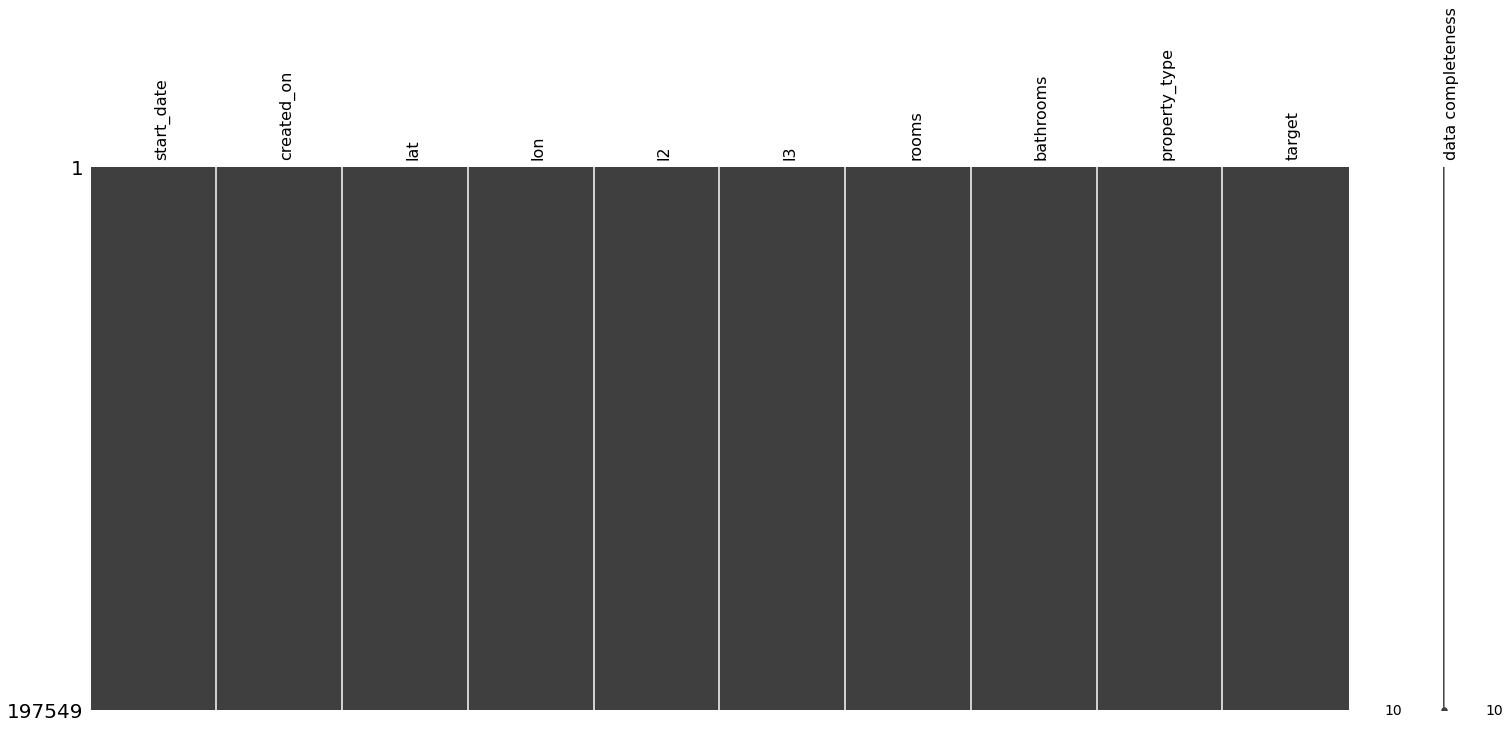

In [14]:
#verifico la transformacion del dataset
msno.matrix(df_train, labels = True, label_rotation = 90)
plt.show()

#### Preprocesamieno de datos
Normalizacion de las variables para que pueda ser entendido por los algoritmos.

In [15]:
#normalización las variables con fechas
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
df_train['start_date']= scaler.fit_transform(df_train['start_date'].values.reshape(-1,1))
df_train['created_on']= scaler.fit_transform(df_train['start_date'].values.reshape(-1,1))

In [16]:
#normalización las variables numericas
from sklearn.preprocessing import PowerTransformer #normalizo variable numerica
pt = PowerTransformer()
df_train['lat'] = pt.fit_transform(df_train['lat'].values.reshape(-1, 1))
df_train['lon'] = pt.fit_transform(df_train['lon'].values.reshape(-1, 1))
df_train['rooms'] = pt.fit_transform(df_train['rooms'].values.reshape(-1, 1))
df_train['bathrooms'] = pt.fit_transform(df_train['bathrooms'].values.reshape(-1, 1))

In [17]:
#normalización las variables categoricas nominales
from sklearn.preprocessing import OneHotEncoder #codificacion variables categoricas

cat_encoded = df_train[["l2","l3","property_type"]]
ohe = OneHotEncoder(handle_unknown = 'ignore')
df_cat_encoded = pd.DataFrame(ohe.fit_transform(cat_encoded).toarray())

In [18]:
df_train = df_train.join(df_cat_encoded) #uno al dataframe las variables categoricas nominales codificadas
y_train = df_train["target"] # extraigo la vaiable objetivo
df_train.drop(columns=["l2","l3","property_type","target"],inplace=True) #elimino las columnas que fueron codificadas

#### Relizamos la predicción y evaluamos el modelo

In [19]:
#importamos el conjunto de prueba
X_test=pd.read_csv("df_test_preprocess.csv", index_col=False)

In [20]:
#filtramos las primeras 308 de las 338 columnas, porque es lo que nuestro algoritmo esperará del conjuntode entrenamiento
X_train_fil=df_train.iloc[:, :308] ##filtro

##### Modelo

In [21]:

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

cl =  HistGradientBoostingClassifier()
cl.fit(X_train_fil,y_train) #se entrena el modelo

# Predicciones
y_train_pred = cl.predict(X_train_fil)
y_test_pred = cl.predict(X_test)



c:\Users\ferna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\ferna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\ferna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but HistGradientBoostingClassifier was fitted without feature names
  warnings.warn(


##### Metricas

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


In [23]:

gradient_train_accuracy = accuracy_score(y_train, y_train_pred)
recall= recall_score(y_train, y_train_pred)
specifity= recall_score(y_train, y_train_pred, pos_label=0)
print('Desempeño del modelo para el Training set: ',gradient_train_accuracy)
print("Recall: ",recall)
print("pecifity: ",specifity)


Desempeño del modelo para el Training set:  0.8515456924611109
Recall:  0.5246547898580384
pecifity:  0.9519546344820284


##### Matriz de confución

In [24]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix (y_train,y_train_pred)
matrix

array([[143867,   7261],
       [ 22066,  24355]], dtype=int64)

<AxesSubplot:>

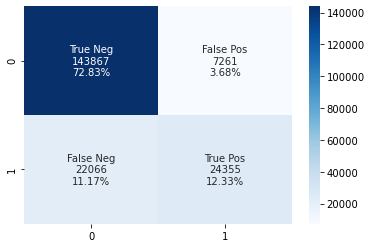

In [25]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts= ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt="", cmap='Blues')

In [26]:
#guardo la prediccion
pd.DataFrame(y_test_pred).to_csv("FernandoGuillermo.csv", index=False)

clf.fit(X.values,y.values)